In [1]:
import numpy as np

num_features = 2
loc = 1
scale = 0.5

x_train = np.vstack([np.random.normal(size=(9000, num_features)), np.random.normal(loc=loc, scale=scale, size=(1000, num_features))])
x_train.shape

(10000, 2)

In [2]:
y_train = np.hstack([np.zeros((9000,)), np.ones((1000,))])
y_train.shape

(10000,)

In [3]:
x_test = np.vstack([np.random.normal(size=(900, num_features)), np.random.normal(loc=loc, scale=scale, size=(100, num_features))])
x_test.shape

(1000, 2)

In [4]:
y_test = np.hstack([np.zeros((900,)), np.ones((100,))])
y_test.shape

(1000,)

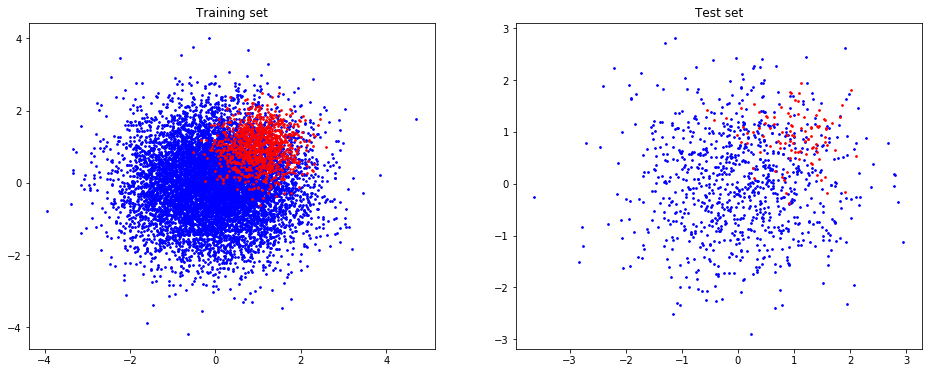

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("Training set")
plt.subplot(1, 2, 2)
plt.scatter(x_test[:900, 0], x_test[:900, 1], s=3, c='b')
plt.scatter(x_test[900:, 0], x_test[900:, 1], s=3, c='r')
plt.title("Test set")

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras.backend as K

def auc(y_true, y_pred):
    y_true_1 = tf.equal(y_true, 1)
    y_true_0 = tf.equal(y_true, 0)
    a = tf.boolean_mask(y_pred, y_true_1)
    b = tf.boolean_mask(y_pred, y_true_0)
    return K.mean(a[None, :] > b[:, None])

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

In [8]:
model.fit(x_train, y_train, batch_size=1000, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 1s - loss: 0.6961 - acc: 0.5317 - auc: 0.6088 - val_loss: 0.6556 - val_acc: 0.7540 - val_auc: 0.5278
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.6221 - acc: 0.8453 - auc: 0.4600 - val_loss: 0.5881 - val_acc: 0.9000 - val_auc: 0.4342
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.5592 - acc: 0.9000 - auc: 0.4315 - val_loss: 0.5325 - val_acc: 0.9000 - val_auc: 0.4387
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.5079 - acc: 0.9000 - auc: 0.4572 - val_loss: 0.4870 - val_acc: 0.9000 - val_auc: 0.4735
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.4658 - acc: 0.9000 - auc: 0.4995 - val_loss: 0.4493 - val_acc: 0.9000 - val_auc: 0.5216
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.4305 - acc: 0.9000 - auc: 0.5507 - val_loss: 0.4176 - val_acc: 0.9000 - val_auc

10000/10000 [==============================] - 0s - loss: 0.1921 - acc: 0.9052 - auc: 0.9257 - val_loss: 0.2102 - val_acc: 0.9000 - val_auc: 0.9060
Epoch 52/100
10000/10000 [==============================] - 0s - loss: 0.1920 - acc: 0.9049 - auc: 0.9270 - val_loss: 0.2102 - val_acc: 0.9040 - val_auc: 0.9059
Epoch 53/100
10000/10000 [==============================] - 0s - loss: 0.1918 - acc: 0.9049 - auc: 0.9263 - val_loss: 0.2100 - val_acc: 0.9030 - val_auc: 0.9060
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 0.1916 - acc: 0.9056 - auc: 0.9264 - val_loss: 0.2099 - val_acc: 0.9020 - val_auc: 0.9061
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 0.1915 - acc: 0.9054 - auc: 0.9267 - val_loss: 0.2098 - val_acc: 0.9020 - val_auc: 0.9061
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 0.1913 - acc: 0.9055 - auc: 0.9268 - val_loss: 0.2097 - val_acc: 0.9010 - val_auc: 0.9062
Epoch 57/100
10000/10000 [=====================

In [9]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[875,  72],
       [ 25,  28]])

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.90714444444444431

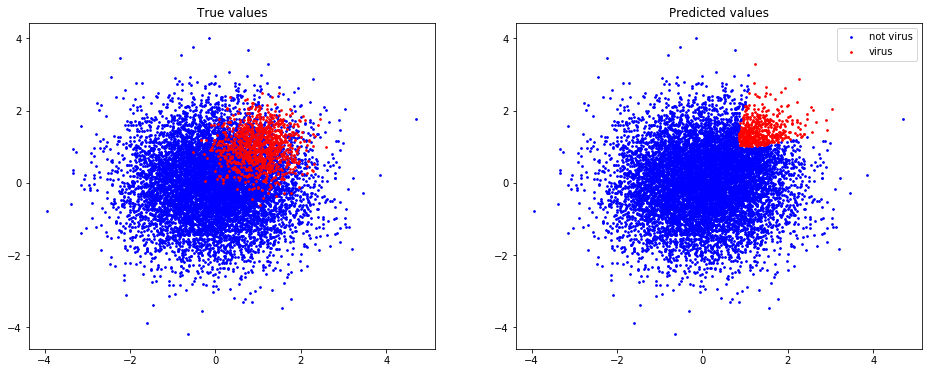

In [11]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.5, :]
x_false = x_train[y_pred[:, 0] <= 0.5, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")

In [12]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

In [13]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight

array([ 0.55555556,  5.        ])

In [14]:
model.fit(x_train, y_train, batch_size=1000, epochs=100, validation_data=(x_test, y_test), class_weight=class_weight)

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.6747 - acc: 0.5908 - auc: 0.1360 - val_loss: 0.6328 - val_acc: 0.7460 - val_auc: 0.1683
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.6086 - acc: 0.8533 - auc: 0.1647 - val_loss: 0.5730 - val_acc: 0.9000 - val_auc: 0.1966
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.5523 - acc: 0.9000 - auc: 0.2010 - val_loss: 0.5235 - val_acc: 0.9000 - val_auc: 0.2294
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.5059 - acc: 0.9000 - auc: 0.2445 - val_loss: 0.4825 - val_acc: 0.9000 - val_auc: 0.2792
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.4667 - acc: 0.9000 - auc: 0.3044 - val_loss: 0.4478 - val_acc: 0.9000 - val_auc: 0.3438
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.4330 - acc: 0.9000 - auc: 0.3892 - val_loss: 0.4176 - val_acc: 0.9000 - val_auc

10000/10000 [==============================] - 0s - loss: 0.1930 - acc: 0.9048 - auc: 0.9268 - val_loss: 0.2103 - val_acc: 0.9030 - val_auc: 0.9061
Epoch 52/100
10000/10000 [==============================] - 0s - loss: 0.1927 - acc: 0.9048 - auc: 0.9268 - val_loss: 0.2101 - val_acc: 0.9030 - val_auc: 0.9062
Epoch 53/100
10000/10000 [==============================] - 0s - loss: 0.1925 - acc: 0.9050 - auc: 0.9264 - val_loss: 0.2100 - val_acc: 0.9010 - val_auc: 0.9063
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 0.1923 - acc: 0.9046 - auc: 0.9271 - val_loss: 0.2098 - val_acc: 0.9010 - val_auc: 0.9063
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 0.1922 - acc: 0.9050 - auc: 0.9266 - val_loss: 0.2097 - val_acc: 0.9020 - val_auc: 0.9064
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 0.1920 - acc: 0.9051 - auc: 0.9268 - val_loss: 0.2096 - val_acc: 0.9030 - val_auc: 0.9066
Epoch 57/100
10000/10000 [=====================

In [15]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[877,  74],
       [ 23,  26]])

In [16]:
roc_auc_score(y_test, y_pred)

0.90743333333333331

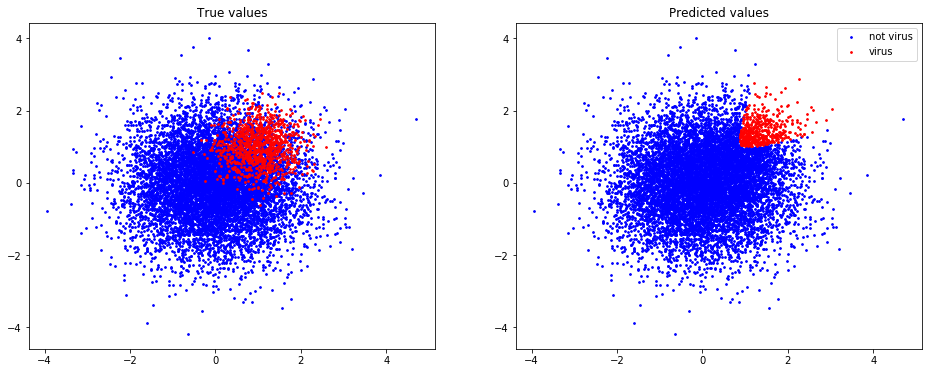

In [17]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.5, :]
x_false = x_train[y_pred[:, 0] <= 0.5, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")

In [18]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

from utils import sample_binomial
from keras.losses import binary_crossentropy

def reinforce_loss(y_true, y_pred):
    y_samp = sample_binomial(y_pred)
    rewards = auc(y_true, y_samp)
    baseline = auc(y_true, y_pred)
    advantages = rewards - baseline
    return advantages * binary_crossentropy(y_samp, y_pred)

model.compile(loss=reinforce_loss, optimizer='adam', metrics=['accuracy', auc])

In [19]:
model.fit(x_train, y_train, batch_size=1000, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.0749 - acc: 0.7228 - auc: 0.1007 - val_loss: 0.0882 - val_acc: 0.8250 - val_auc: 0.1142
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.0889 - acc: 0.7532 - auc: 0.0963 - val_loss: 0.1003 - val_acc: 0.6350 - val_auc: 0.1131
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.1009 - acc: 0.5004 - auc: 0.0931 - val_loss: 0.0855 - val_acc: 0.4520 - val_auc: 0.1115
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.1082 - acc: 0.4290 - auc: 0.0963 - val_loss: 0.0975 - val_acc: 0.4350 - val_auc: 0.1326
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.0688 - acc: 0.4660 - auc: 0.1527 - val_loss: 0.0261 - val_acc: 0.5150 - val_auc: 0.2242
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.0130 - acc: 0.5187 - auc: 0.2091 - val_loss: 0.0136 - val_acc: 0.5240 - val_auc

10000/10000 [==============================] - 0s - loss: -0.0598 - acc: 0.6690 - auc: 0.3381 - val_loss: -0.0592 - val_acc: 0.6850 - val_auc: 0.3655
Epoch 52/100
10000/10000 [==============================] - 0s - loss: -0.1307 - acc: 0.6567 - auc: 0.4306 - val_loss: -0.2094 - val_acc: 0.6560 - val_auc: 0.5352
Epoch 53/100
10000/10000 [==============================] - 0s - loss: -0.2594 - acc: 0.5722 - auc: 0.6086 - val_loss: -0.2962 - val_acc: 0.4430 - val_auc: 0.6711
Epoch 54/100
10000/10000 [==============================] - 0s - loss: -0.3161 - acc: 0.3907 - auc: 0.7349 - val_loss: -0.3376 - val_acc: 0.3730 - val_auc: 0.7549
Epoch 55/100
10000/10000 [==============================] - 0s - loss: -0.3558 - acc: 0.3470 - auc: 0.7874 - val_loss: -0.3212 - val_acc: 0.3370 - val_auc: 0.7434
Epoch 56/100
10000/10000 [==============================] - 0s - loss: -0.3328 - acc: 0.3510 - auc: 0.7508 - val_loss: -0.2801 - val_acc: 0.3630 - val_auc: 0.7000
Epoch 57/100
10000/10000 [=========

In [35]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.75, y_test)

array([[900, 100],
       [  0,   0]])

In [31]:
roc_auc_score(y_test, y_pred)

0.75721111111111106

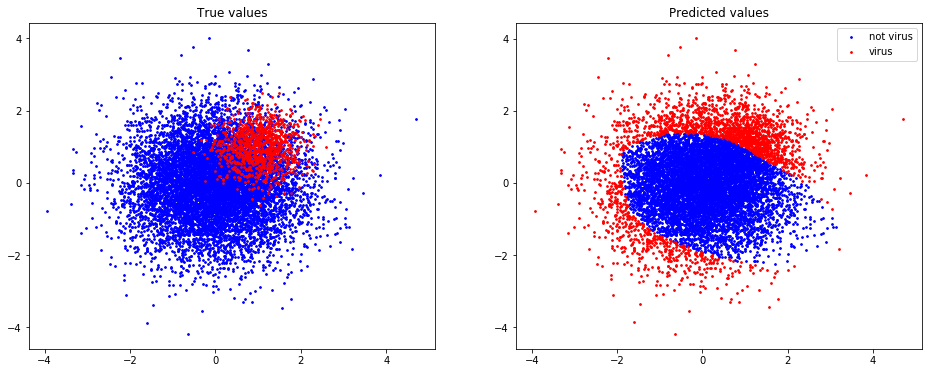

In [32]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.75, :]
x_false = x_train[y_pred[:, 0] <= 0.75, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")

In [33]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

def auc_loss(y_true, y_pred):
    y_true_1 = tf.equal(y_true[:, 0], 1)
    y_true_0 = tf.equal(y_true[:, 0], 0)
    prob_1 = tf.boolean_mask(y_pred, y_true_1)
    prob_0 = tf.boolean_mask(y_pred, y_true_0)
    agtb = tf.cast(prob_1[:, None] > prob_0[None, :], tf.float32)
    rewards_1 = tf.reduce_mean(agtb, axis=1)
    rewards_0 = tf.reduce_mean(agtb, axis=0)
    advantages_1 = 1 - rewards_1
    advantages_0 = 1 - rewards_0
    return tf.reduce_mean(advantages_1 * -tf.log(prob_1)) + tf.reduce_mean(advantages_0 * tf.log(prob_0))

model.compile(loss=auc_loss, optimizer='adam', metrics=['accuracy', auc])

In [34]:
model.fit(x_train, y_train, batch_size=1000, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
 1000/10000 [==>...........................] - ETA: 0s - loss: 0.0221 - acc: 0.9070 - auc: 0.4843

/home/tambet/.conda/envs/robotex/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


10000/10000 [==============================] - 0s - loss: 0.0079 - acc: 0.8703 - auc: 0.7517 - val_loss: 0.0035 - val_acc: 0.8020 - val_auc: 0.8784
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.0021 - acc: 0.7749 - auc: 0.9157 - val_loss: 0.0032 - val_acc: 0.7040 - val_auc: 0.8970
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.0021 - acc: 0.7123 - auc: 0.9203 - val_loss: 0.0029 - val_acc: 0.6620 - val_auc: 0.8983
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.0018 - acc: 0.6807 - auc: 0.9220 - val_loss: 0.0024 - val_acc: 0.6390 - val_auc: 0.8990
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.0013 - acc: 0.6637 - auc: 0.9222 - val_loss: 0.0017 - val_acc: 0.6300 - val_auc: 0.8977
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 8.4783e-04 - acc: 0.6549 - auc: 0.9176 - val_loss: 0.0010 - val_acc: 0.6230 - val_auc: 0.8797
Epoch 7/100
10000/10000 [=======================

10000/10000 [==============================] - 0s - loss: 4.4480e-05 - acc: 0.4857 - auc: 0.8983 - val_loss: 4.4771e-05 - val_acc: 0.4590 - val_auc: 0.8961
Epoch 50/100
10000/10000 [==============================] - 0s - loss: 4.3548e-05 - acc: 0.4823 - auc: 0.8989 - val_loss: 5.7526e-05 - val_acc: 0.4540 - val_auc: 0.8781
Epoch 51/100
10000/10000 [==============================] - 0s - loss: 3.7262e-05 - acc: 0.4798 - auc: 0.8985 - val_loss: 4.1313e-05 - val_acc: 0.4540 - val_auc: 0.8703
Epoch 52/100
10000/10000 [==============================] - 0s - loss: 3.9380e-05 - acc: 0.4775 - auc: 0.9019 - val_loss: 5.0232e-05 - val_acc: 0.4510 - val_auc: 0.9057
Epoch 53/100
10000/10000 [==============================] - 0s - loss: 4.2805e-05 - acc: 0.4753 - auc: 0.8949 - val_loss: 7.7181e-05 - val_acc: 0.4490 - val_auc: 0.8961
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 5.8868e-05 - acc: 0.4735 - auc: 0.9016 - val_loss: 9.4667e-05 - val_acc: 0.4460 - val_auc: 0.7925

10000/10000 [==============================] - 0s - loss: 4.7923e-05 - acc: 0.3959 - auc: 0.8996 - val_loss: 5.8666e-05 - val_acc: 0.3670 - val_auc: 0.9044
Epoch 98/100
10000/10000 [==============================] - 0s - loss: 3.2657e-05 - acc: 0.3951 - auc: 0.9097 - val_loss: 4.1738e-05 - val_acc: 0.3630 - val_auc: 0.8925
Epoch 99/100
10000/10000 [==============================] - 0s - loss: 3.5140e-05 - acc: 0.3925 - auc: 0.9037 - val_loss: 7.7516e-05 - val_acc: 0.3620 - val_auc: 0.8729
Epoch 100/100
10000/10000 [==============================] - 0s - loss: 3.7272e-05 - acc: 0.3929 - auc: 0.9066 - val_loss: 9.8579e-05 - val_acc: 0.3580 - val_auc: 0.8190


In [51]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5185, y_test)

array([[683,  26],
       [217,  74]])

In [55]:
roc_auc_score(y_test, y_pred)

0.88541666666666652

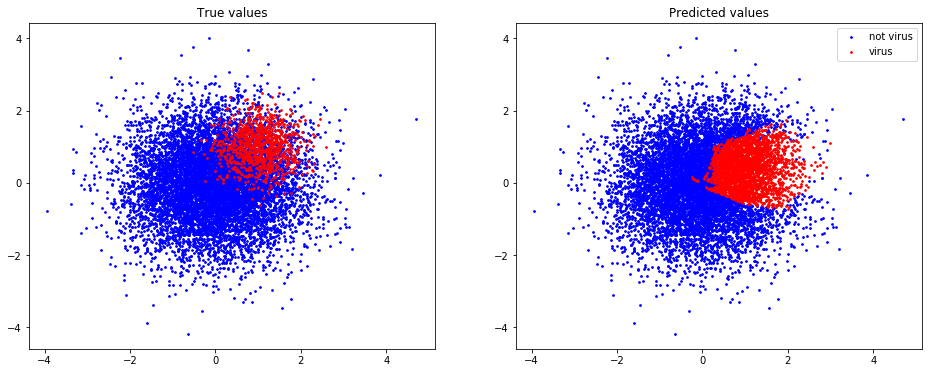

In [52]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.5185, :]
x_false = x_train[y_pred[:, 0] <= 0.5185, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")